<p>Epsillon and Tolerance are also known as hyperparameter</p>
<p>There are 3 methods to find perfect value of Epsillon <br>
    &nbsp&nbsp 1. Greed Search<br>
    &nbsp&nbsp 2. Random Search<br>
    &nbsp&nbsp 3. Hybrid Search</p>
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('csv/wisconsin_breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.drop(columns=['id','Unnamed: 32'],inplace=True)
data.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [5]:
y=data['diagnosis']

In [6]:
y.replace(to_replace=['B','M'],value=[0,1],inplace=True)
y=np.array(y)
y.shape

(569,)

In [7]:
x=data.iloc[:,1:]
x=np.array(x)
x_min,x_max=x.min(),x.max()
x=(x-x.mean(axis=0))/x.std(axis=0)
x.shape

(569, 30)

In [8]:
x[1].shape

(30,)

# Logistic Regression Class

In [9]:
class Binary_logistic_Regression:
    def __init__(self,theta0_initial=None,epsilon=0.001,tol=0.001,max_iter=50000,theta_initial=None,error_list=None,approach='bgd',batch_size=1):
        self.theta_initial=theta_initial
        self.theta0_initial=theta0_initial
        self.epsilon=epsilon
        self.tol=tol
        self.max_iter=max_iter
        self.error_list=np.array([])
        self.approach=approach
        self.batch_size=batch_size
        
    
    
    def fit(self,X,Y):
        if X.shape[0]!=Y.shape[0]:
            raise Exception('Dimensions of x and y are not same')
        Y=Y.reshape(-1,1)
        self.theta_initial=np.random.normal(0,1,size=(X.shape[1],1))
        self.theta0_initial=0
        counter=0
        
        def sigmoid(theta0,theta):
            return 1/(1+np.exp(-(theta0+np.matmul(x,theta))))

        def del_t_by_del_theta0(theta0,theta):
            return np.sum(sigmoid(theta0,theta)-y)

        def del_t_by_del_theta(theta0,theta):
            return np.matmul((sigmoid(theta0,theta)-y).T,x).T

        def binary_cross_entropy(theta0,theta):
            return -(np.dot(y.T,np.log(sigmoid(theta0,theta)))+np.dot((1-y).T,np.log(1-sigmoid(theta0,theta))))
        
        def create_mini_batch(X,Y,batch_size):
            mini_batches=[]
            data=np.hstack((X,Y.reshape(-1,1)))
            np.random.shuffle(data)
            n=data.shape[0]//batch_size
            for i in range(n+1):
                temp_x=data[i*batch_size:(i+1)*batch_size,:-1]
                temp_y=data[i*batch_size:(i+1)*batch_size,-1].reshape((-1,1))
                mini_batches.append((temp_x,temp_y))
            if X.shape[0]%batch_size!=0:
                temp_x=data[i*batch_size:X.shape[0],:-1]
                temp_y=data[i*batch_size:X.shape[0],-1].reshape((-1,1))
                mini_batches.append((temp_x,temp_y))
            return mini_batches
            
        
        def gradient_approach():
            error_list=np.array([])
            theta0_final=self.theta0_initial-self.epsilon*del_t_by_del_theta0(self.theta0_initial,self.theta_initial)
            theta_final=self.theta_initial-self.epsilon*del_t_by_del_theta(self.theta0_initial,self.theta_initial)


            if np.abs(binary_cross_entropy(theta0_final,theta_final) - binary_cross_entropy(self.theta0_initial,self.theta_initial))<self.tol:
                return 

            self.theta0_initial=theta0_final
            self.theta_initial=theta_final
            if binary_cross_entropy(theta0_final,theta_final)!=[[np.nan]]:
                error_list=np.append(error_list, binary_cross_entropy(theta0_final,theta_final))
            print(f'The value of binary cross entropy at epoch # {counter} is {binary_cross_entropy(theta0_final,theta_final)}')
            return error_list

        
        if self.approach=='bgd':
            x,y=X,Y
            while counter<=self.max_iter:
                a=gradient_approach()
                if a!=None:
                    self.error_list=np.append(self.error_list,a)
                counter+=1
            
        elif self.approach=='sgd':
            while counter<=self.max_iter:
                temp=np.array([])
                for i in range(len(X)):
                    x,y=X[i].reshape((1,-1)),Y[i]
                    #x=x.reshape(1,-1)
                    a=gradient_approach()
                    if a!=None:
                        temp=np.append(temp,a) 
                self.error_list=np.append(self.error_list,np.mean(temp))
                counter+=1
        elif self.approach=='mbgd':
            while counter<=self.max_iter:
                mini_batches=create_mini_batch(X,Y,self.batch_size)
                temp=np.array([])
                for mini_batch in mini_batches:
                    x,y=mini_batch
                    a=gradient_approach()
                    if a!=None:
                        temp=np.append(temp,a)
                self.error_list=np.append(self.error_list,np.mean(temp))
                counter+=1
            
            
    def predict(self,test_x):
        def sigmoid(theta0,theta):
            return 1/(1+np.exp(-(theta0+np.matmul(test_x,theta))))
        
        predicted_value=sigmoid(self.theta0_initial,self.theta_initial)
        
        pred_class=[1 if i>0.5 else 0 for i in predicted_value]
        
        return np.array(pred_class)
    
    def accuracy_score(self,pred_y,test_y):
        if len(pred_y)==len(test_y):
            return np.sum(pred_y==test_y)/len(pred_y)
        else:
            raise Exception('Length of test_y and pred_y must be same')
            
    def plot_graph(self):
        print(self.error_list.shape)
        plt.plot(self.error_list)
        plt.xlabel('Loss')
        plt.ylabel('Epochs')
        plt.show()

In [10]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
lr=Binary_logistic_Regression(max_iter=200,epsilon=0.001,tol=0.0001,approach='mbgd',batch_size=64)

In [12]:
lr.fit(train_x,train_y)

The value of binary cross entropy at epoch # 0 is [[29.00764777]]
The value of binary cross entropy at epoch # 0 is [[28.0003822]]
The value of binary cross entropy at epoch # 0 is [[25.12384452]]
The value of binary cross entropy at epoch # 0 is [[19.42035317]]
The value of binary cross entropy at epoch # 0 is [[21.06518385]]
The value of binary cross entropy at epoch # 0 is [[22.87263272]]
The value of binary cross entropy at epoch # 0 is [[54.68796143]]
The value of binary cross entropy at epoch # 0 is [[1.86256822]]
The value of binary cross entropy at epoch # 0 is [[1.8499799]]
The value of binary cross entropy at epoch # 1 is [[26.28601701]]
The value of binary cross entropy at epoch # 1 is [[50.53477917]]
The value of binary cross entropy at epoch # 1 is [[15.40924285]]
The value of binary cross entropy at epoch # 1 is [[21.41263356]]
The value of binary cross entropy at epoch # 1 is [[30.68843641]]
The value of binary cross entropy at epoch # 1 is [[17.10245132]]
The value of b

C:\Users\anils\AppData\Local\Temp\ipykernel_5896\1266056403.py:32: RuntimeWarning: divide by zero encountered in log
  return -(np.dot(y.T,np.log(sigmoid(theta0,theta)))+np.dot((1-y).T,np.log(1-sigmoid(theta0,theta))))


The value of binary cross entropy at epoch # 61 is [[2.05754744]]
The value of binary cross entropy at epoch # 61 is [[nan]]
The value of binary cross entropy at epoch # 61 is [[2.47491494]]
The value of binary cross entropy at epoch # 61 is [[2.91561315]]
The value of binary cross entropy at epoch # 61 is [[12.31574984]]
The value of binary cross entropy at epoch # 61 is [[10.10541362]]
The value of binary cross entropy at epoch # 61 is [[1.8678905]]
The value of binary cross entropy at epoch # 61 is [[2.54911073]]
The value of binary cross entropy at epoch # 61 is [[2.54021622]]
The value of binary cross entropy at epoch # 62 is [[3.06036315]]
The value of binary cross entropy at epoch # 62 is [[4.59304577]]
The value of binary cross entropy at epoch # 62 is [[2.71351993]]
The value of binary cross entropy at epoch # 62 is [[7.42870902]]
The value of binary cross entropy at epoch # 62 is [[nan]]
The value of binary cross entropy at epoch # 62 is [[1.99706244]]
The value of binary cro

The value of binary cross entropy at epoch # 125 is [[3.0539031]]
The value of binary cross entropy at epoch # 125 is [[1.94929942]]
The value of binary cross entropy at epoch # 125 is [[nan]]
The value of binary cross entropy at epoch # 125 is [[4.85229055]]
The value of binary cross entropy at epoch # 125 is [[4.10585428]]
The value of binary cross entropy at epoch # 125 is [[1.22952482]]
The value of binary cross entropy at epoch # 125 is [[3.46248859]]
The value of binary cross entropy at epoch # 125 is [[0.47398956]]
The value of binary cross entropy at epoch # 125 is [[0.47203656]]
The value of binary cross entropy at epoch # 126 is [[4.62230008]]
The value of binary cross entropy at epoch # 126 is [[3.03139549]]
The value of binary cross entropy at epoch # 126 is [[nan]]
The value of binary cross entropy at epoch # 126 is [[2.82448171]]
The value of binary cross entropy at epoch # 126 is [[5.26869717]]
The value of binary cross entropy at epoch # 126 is [[2.51391118]]
The value 

The value of binary cross entropy at epoch # 193 is [[4.22938813]]
The value of binary cross entropy at epoch # 193 is [[1.80380089]]
The value of binary cross entropy at epoch # 193 is [[3.01212696]]
The value of binary cross entropy at epoch # 193 is [[nan]]
The value of binary cross entropy at epoch # 193 is [[9.97290503]]
The value of binary cross entropy at epoch # 193 is [[3.6997719]]
The value of binary cross entropy at epoch # 193 is [[1.06623845]]
The value of binary cross entropy at epoch # 193 is [[1.68190372]]
The value of binary cross entropy at epoch # 193 is [[1.6762093]]
The value of binary cross entropy at epoch # 194 is [[3.00260985]]
The value of binary cross entropy at epoch # 194 is [[nan]]
The value of binary cross entropy at epoch # 194 is [[4.68787319]]
The value of binary cross entropy at epoch # 194 is [[1.42785406]]
The value of binary cross entropy at epoch # 194 is [[5.50696033]]
The value of binary cross entropy at epoch # 194 is [[2.07687609]]
The value o

In [13]:
pred_y=lr.predict(test_x)

In [14]:
pred_y

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0])

In [15]:
lr.accuracy_score(pred_y,test_y)

0.9736842105263158

(201,)


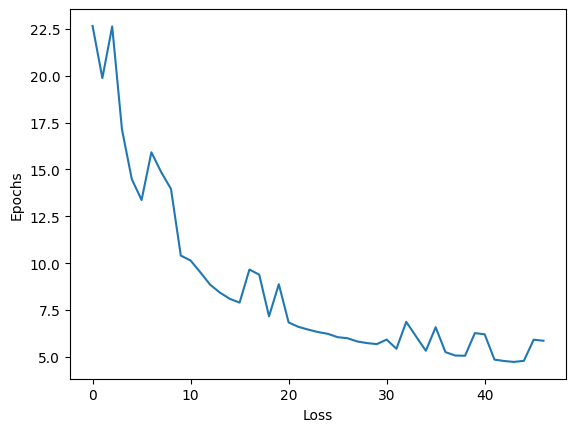

In [16]:
lr.plot_graph()

# Using sk-learn

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sk_lr=LogisticRegression()
sk_lr.fit(train_x,train_y)
sk_pred_y=lr.predict(test_x)
print(accuracy_score(sk_pred_y,test_y))

0.9736842105263158


In [18]:
sk_pred_y

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0])

In [19]:
a=np.array([1,2,4])

In [20]:
a=np.array([[1,2,3],[4,5,6],[7,8,9]])
b=np.array([1,0,1]).reshape(-1,1)
aa=np.hstack((a,b))
aa

array([[1, 2, 3, 1],
       [4, 5, 6, 0],
       [7, 8, 9, 1]])